# **0. 패키지 로딩**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [2]:
np.set_printoptions(suppress = True)

# **1. 데이터 불러오기**

- 현재 매장은 `type`에 따라 5개로 구분되어있는 상태
  - typeA, typeB, typeC, typeD, typeE
  


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## 파일 상위 경로 설정
# 본인 경로에 맞게 수정 필요(작업하는 곳에 공유 드라이브 바로가기 해두면 편함)

train_path = '/content/drive/MyDrive/Colab Notebooks/ESAA/OB/방학프로젝트/방학프로젝트/data/modeling/train'
val_path = '/content/drive/MyDrive/Colab Notebooks//ESAA/OB/방학프로젝트/방학프로젝트/data/modeling/val'
test_path = '/content/drive/MyDrive/Colab Notebooks/ESAA/OB/방학프로젝트/방학프로젝트/data/modeling/test'

In [5]:
# 데이터 파일 경로 저장
train_files = [os.path.join(train_path, f'train{i}.csv') for i in ['A', 'B', 'C', 'D', 'E']]
val_files = [os.path.join(val_path, f'val{i}.csv') for i in ['A', 'B', 'C', 'D', 'E']]
test_files = [os.path.join(test_path, f'test{i}.csv') for i in ['A', 'B', 'C', 'D', 'E']]

# 각 파일을 데이터프레임 형태로 불러오기
train_types = [pd.read_csv(file) for file in train_files]
val_types = [pd.read_csv(file) for file in val_files]
test_types = [pd.read_csv(file) for file in test_files]

In [6]:
### 데이터 확인

print(train_files)
print(val_files)
print(test_files)

['/content/drive/MyDrive/Colab Notebooks/ESAA/OB/방학프로젝트/방학프로젝트/data/modeling/train/trainA.csv', '/content/drive/MyDrive/Colab Notebooks/ESAA/OB/방학프로젝트/방학프로젝트/data/modeling/train/trainB.csv', '/content/drive/MyDrive/Colab Notebooks/ESAA/OB/방학프로젝트/방학프로젝트/data/modeling/train/trainC.csv', '/content/drive/MyDrive/Colab Notebooks/ESAA/OB/방학프로젝트/방학프로젝트/data/modeling/train/trainD.csv', '/content/drive/MyDrive/Colab Notebooks/ESAA/OB/방학프로젝트/방학프로젝트/data/modeling/train/trainE.csv']
['/content/drive/MyDrive/Colab Notebooks//ESAA/OB/방학프로젝트/방학프로젝트/data/modeling/val/valA.csv', '/content/drive/MyDrive/Colab Notebooks//ESAA/OB/방학프로젝트/방학프로젝트/data/modeling/val/valB.csv', '/content/drive/MyDrive/Colab Notebooks//ESAA/OB/방학프로젝트/방학프로젝트/data/modeling/val/valC.csv', '/content/drive/MyDrive/Colab Notebooks//ESAA/OB/방학프로젝트/방학프로젝트/data/modeling/val/valD

In [7]:
train_types[3].head()

,sales,onpromotion,dcoilwtico,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,1.098612,0.550582,-0.772666,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.117077,-0.524798,-0.554732,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2.197225,-0.524798,-0.567332,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5.375357,1.379962,-0.396456,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3.806662,0.832181,-0.435203,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# **2. 평가 지표**
- Root Mean Squared Logarithmic Error(`RMSLE`)
  - 다음과 같이 계산  
  $ \sqrt{ \frac{1}{n} \sum_{i=1}^n \left(\log (1 + \hat{y}_i) - \log (1 + y_i)\right)^2} $
  - $n$: 총 인스턴스 수
  - $ \hat{y}_i$: 인스턴스 $i$에 대한 타겟의 예측값
  - $y_i$: 인스턴스 $i$에 대한 타겟의 실제값

In [8]:
from sklearn.metrics import mean_squared_log_error

### RMSLE 계산
def rmsle(y, pred):
    # 오버플로, 언더플로 방지를 위해 log1p()로 로그 변환
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)

    squared_error = (log_y - log_pred) ** 2

    rmsle = np.sqrt(np.mean(squared_error))

    return rmsle

# **3. 모델별 성능 확인을 위한 함수**

In [9]:
colors = [
    'khaki', 'teal', 'orchid', 'sandybrown', 'greenyellow', 'dodgerblue', 'rosybrown',
    'deeppink', 'salmon', 'olivedrab', 'olive', 'forestgreen',
    'royalblue', 'mediumpurple', 'gold', 'seagreen',
    'turquoise', 'steelblue', 'slategray', 'peru', 'slateblue', 'cadetblue',
    'lime', 'lavender', 'lightcoral', 'lightseagreen', 'lightskyblue', 'lightgreen',
    'lightpink', 'lightsalmon', 'lightsteelblue', 'lightyellow', 'palegreen',
]

In [10]:
## 회귀곡선 시각화
# 예측값, 실제값을 산점도로 표현

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(10, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='b')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

In [11]:
def model_eval(name_, pred, actual):
    global my_predictions
    global colors

    plot_predictions(name_, pred, actual)

    rmsle = np.sqrt(mean_squared_log_error(actual, pred))

    my_predictions[name_] = {'rmsle': rmsle}

    # 데이터프레임 생성
    df = pd.DataFrame(my_predictions).T
    df['model'] = df.index
    df = df.sort_values(by=['rmsle'], ascending=[True])

    # 상한, 하한 설정
    min_ = df['rmsle'].min() - 0.1
    max_ = df['rmsle'].max() + 0.1

    length = len(df)

    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['rmsle'])

    for i, v in enumerate(df['rmsle']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 0.02, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('RMSLE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()

    print()
    print(df)

In [12]:
# 모델의 중요도 상위 10개의 피처명과 그때의 중요도 값을 Series로 반환

def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
    ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]
    return ftr_top10

def visualize_ftr_importances(model):
    fig, ax = plt.subplots(figsize=(7, 5))
    fig.tight_layout()

    ftr_top10 = get_top_features(model)
    ax.set_title(model.__class__.__name__ + ' Feature Importances', size=15)

    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(12)

    sns.barplot(x=ftr_top10.values, y=ftr_top10.index, ax=ax)

# **4. 모델링**

## **🏪 Type D**

In [13]:
trainD = train_types[3]
valD = val_types[3]
testD = test_types[3]

In [14]:
trainD.head()

,sales,onpromotion,dcoilwtico,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,1.098612,0.550582,-0.772666,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.117077,-0.524798,-0.554732,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2.197225,-0.524798,-0.567332,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5.375357,1.379962,-0.396456,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3.806662,0.832181,-0.435203,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
trainD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509057 entries, 0 to 509056
Columns: 104 entries, sales to day_of_week_6
dtypes: float64(3), int64(101)
memory usage: 403.9 MB


In [ ]:
valD.head()

,sales,onpromotion,dcoilwtico,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,302.000,-0.524798,1.198077,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5.000,-0.524798,-0.612767,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,265.478,0.153691,-1.075015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,301.000,1.229071,-0.417393,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,362.000,1.907560,-0.583546,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
testD.head()

,id,onpromotion,dcoilwtico,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,...,month_5,month_6,month_7,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_4
0,3000888,-0.524798,-0.68947,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3000889,-0.524798,-0.68947,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3000890,0.550582,-0.68947,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3000891,2.455342,-0.68947,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3000892,-0.524798,-0.68947,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**데이터 준비**

In [16]:
## Feature vs Target

X_train = trainD.drop('sales', axis=1)
y_train = trainD['sales']

X_val = valD.drop('sales', axis=1)
y_val = valD['sales']

In [17]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(509057, 103) (509057,)
(218168, 103) (218168,)


In [18]:
X_test = testD.drop(['id'], axis = 1)

In [19]:
X_test.shape

(9504, 103)

### **4-1. Base Model**

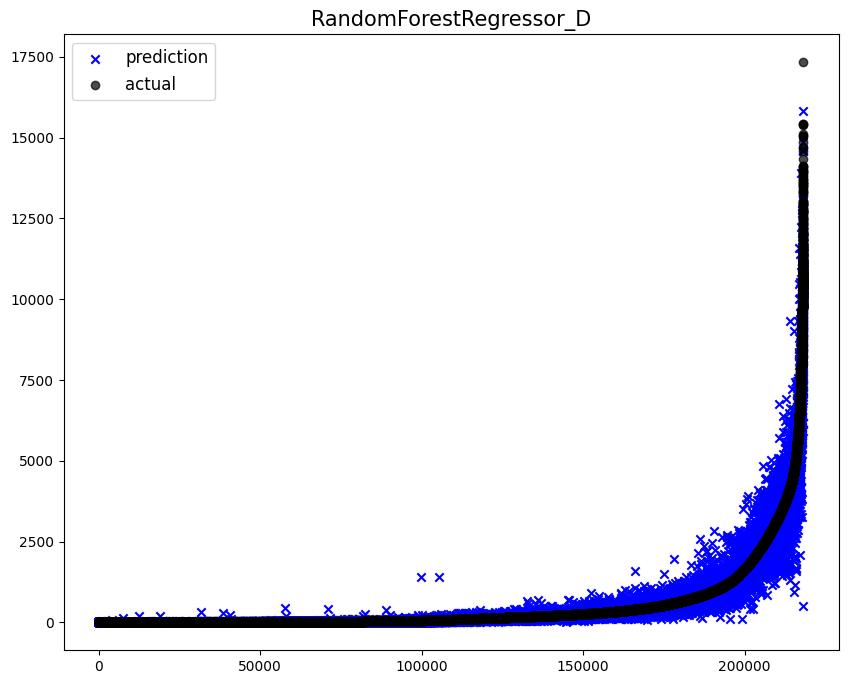

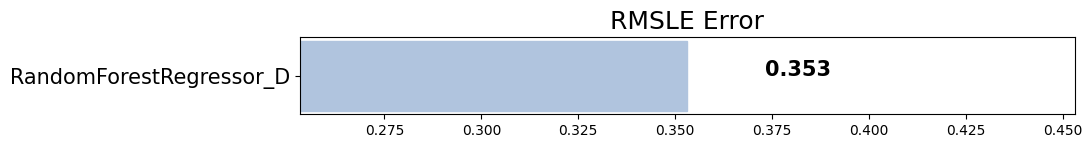


                            rmsle                    model
RandomForestRegressor_D  0.353195  RandomForestRegressor_D


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 기본 모델 생성
rf_baseD = RandomForestRegressor(n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# 모델 학습
rf_baseD.fit(X_train, y_train)

# 모델 예측
rf_predD = rf_baseD.predict(X_val)

# 로그 스케일로 예측된 예측값을 원복
original_rf_predD = np.expm1(rf_predD)

# 모델 평가 및 시각화
model_eval('RandomForestRegressor_D', original_rf_predD, y_val)

### **4-2. 하이퍼 파라미터 튜닝**


#### **HyperOpt**
- 베이지안 최적화 알고리즘을 활용하여 효율적인 하이퍼파라미터 최적화를 제공하는 파이썬 라이브러리
  - 이를 통해 사용자는 자동화된 최적화, 다양한 최적화 알고리즘 선택, 고급 최적화 알고리즘 활용 등을 통해 모델 성능을 향상시킬 수 있음
- **주요 로직**
  1. 입력 변수명과 입력값의 검색 공간 설정
  2. 목적 함수 설정
  3. 목적 함수의 반환 최솟값을 가지는 최적 입력값 유추
- 참고자료  
  [베이지안 최적화에 기반한 HyperOpt를 활용한 하이퍼 파라미터 튜닝](https://teddylee777.github.io/machine-learning/hyper-opt/)

In [20]:
!pip install hyperopt

In [21]:
from hyperopt import hp, fmin, tpe, Trials
from hyperopt import STATUS_OK

In [ ]:
## 검색 공간 설정

space = {
    'n_estimators': hp.choice('n_estimators', range(50, 201)), # 트리 개수
    'max_depth': hp.choice('max_depth', [None, 10, 20, 30]), # 트리의 최대 깊이
    'min_samples_split': hp.choice('min_samples_split', range(2, 11)), # 노드 분할을 위한 최소 샘플 수
    'max_features': hp.choice('max_features', [None, 'sqrt', 'log2']) # 트리 분할 시 사용할 최대 특성의 수
}

In [22]:
## 목적 함수 설정

def objective(params):
    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    y_pred = np.expm1(y_pred) # 원래 스케일로 원복

    rmsle_val = rmsle(y_val, y_pred)

    return {'loss': rmsle_val, 'status': STATUS_OK}

In [39]:
## 파라미터 최적화 수행

trials = Trials()
best = fmin(fn = objective, # 목적 함수
            space = space, # 탐색 공간
            algo = tpe.suggest, # 최적화 적용 알고리즘
            max_evals = 20,  # 최대 반복 횟수
            trials = trials, # 최적값 반환
            rstate = np.random.default_rng(seed = 0)) # seed 설정
print(best)

100%|██████████| 20/20 [2:35:30<00:00, 466.51s/trial, best loss: 0.35156679029764265]
{'max_depth': 0, 'max_features': 0, 'min_samples_split': 1, 'n_estimators': 46}


- 하이퍼 파라미터 튜닝을 진행한 **model**의 성능이 더 좋다.

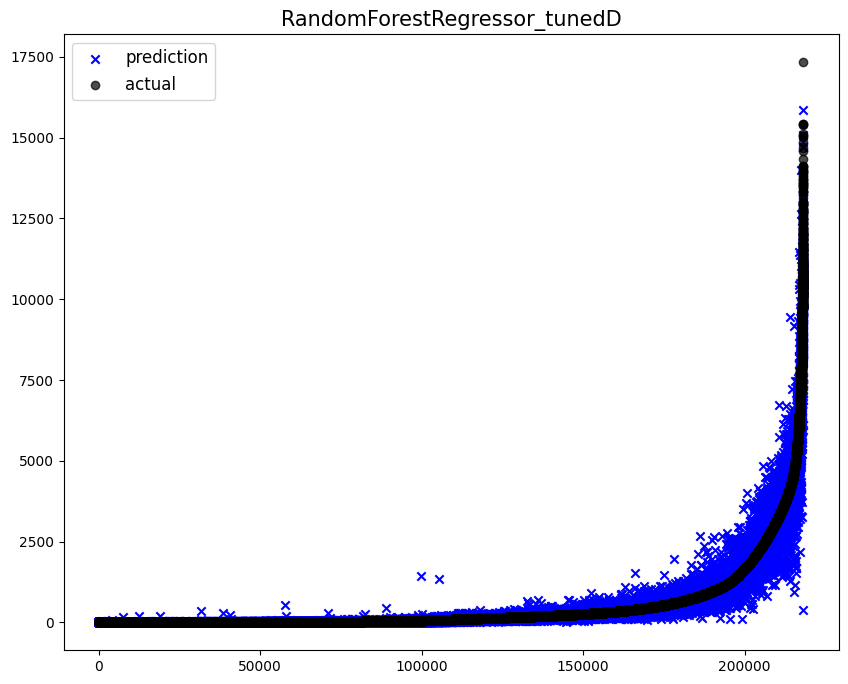

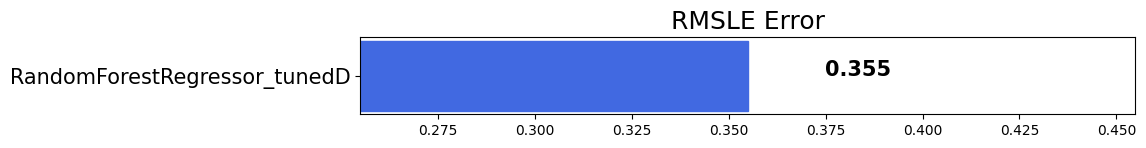


                                rmsle                         model
RandomForestRegressor_tunedD  0.35494  RandomForestRegressor_tunedD


In [23]:
from sklearn.ensemble import RandomForestRegressor

# 최적 모델 생성
rf_tunedD = RandomForestRegressor(max_depth = None, max_features = None, min_samples_leaf = 1,
                                  n_estimators = 46, n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# 모델 학습
rf_tunedD.fit(X_train, y_train)

# 모델 예측
rf_predD = rf_tunedD.predict(X_val)

# 로그 스케일로 예측된 예측값을 원복
original_rf_predD = np.expm1(rf_predD)

# 모델 평가 및 시각화
model_eval('RandomForestRegressor_tunedD', original_rf_predD, y_val)

In [25]:
### 모델 저장

import pickle
import joblib

joblib.dump(rf_tunedD, '/content/drive/MyDrive/Colab Notebooks/ESAA/OB/방학프로젝트/방학프로젝트/model/modelD.pkl')

['/content/drive/MyDrive/Colab Notebooks/ESAA/OB/방학프로젝트/방학프로젝트/model/modelD.pkl']

### **4-3. 최종 예측**